<a href="https://colab.research.google.com/github/alanagadelha/Python-Training/blob/master/atividade_pratica_05_%5BAlana%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="left"> Uso de dados para Ciências da Terra e Ambiental em Python 1 (CTP1) </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Logo_UFF_%28blue%29.svg/320px-Logo_UFF_%28blue%29.svg.png" alt="drawing" style="width:200px;"/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkAFqFW7ctw8U6I5vGdPOpqFpnnExeAUOiIg&s" alt="drawing" width="300";"/>
<img src="https://yt3.googleusercontent.com/ytc/AIdro_lBdDM3DpUsNOOyH-m3vdysjGi1bM9IyPfnchvxfkvymg=s900-c-k-c0x00ffffff-no-rj" alt="drawing" width="200";"/>

Professor: Leonardo Miquelutti

Material provided by EarthLab under [CC BY-NC-ND 4.0](https://www.earthdatascience.org/license/)  
[Copyright (c) Earth Lab](https://www.earthdatascience.org)

# Atividade Prática 05 - Análise de Dados Raster



Valor das questões:

| Item        | Pontos |
|-------------|--------|
| Plot 1      | 20     |
| Questão 1   | 10     |
| Plot 2      | 15     |
| Plot 3      | 20     |
| Plot 4      | 20     |
| Questão 2   | 150    |

Before submitting this assignment, be sure to restart the kernel and run all cells. To do this, pull down the Kernel drop down at the top of this notebook. Then select **restart and run all**.

Make sure you fill in any place that says `YOUR CODE HERE`.

---

## About the 2013 Colorado Floods

The data that you will use for this assignment is the same data that you used in the last assignment. Use: `et.data.get_data("colorado-flood")` to download the data if you do not already have it.

Using the data from the directory as follows:

In the `colorado-flood/spatial/boulder-leehill-rd/` you will see two directories - pre and post flood. each of these directories contains a lidar sub directory that has a DTM and a DSM.tif file. You will use these files to create your lidar CHM.


For all of the plots below, be sure to do the following:
* State the source of each dataset that you use to create the plot either as a plot label or in a caption below the plot
* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels!
* Analyze / interpret what each plot shows in a markdown cell in your notebook. State what the source of the data are and what the plot shows as a driver or impact of the 2013 flood events.
* Clearly document that steps that you took to process the data by commenting your code
* Use clean coding practices - this includes comments, variable names that are informative, clean code spacing, following PEP 8 Python code style guide.
* Make sure all of the libraries that you use in the report are listed in a code cell at the TOP of your Notebook.
* Spell check your Notebook before submitting it.
* Include a markdown cell for each histogram that briefly describes how you selected the classification values used in the raster plots referencing the histograms of the data that you create.



### Write Up
In your notebook, create markdown cells below each raster plot that describes what your classification map shows about changes in the landscape before and after the flood.

Be sure to spell check and proof your text before submitting!


### DATA

The data that you will use for this week is available [here](https://ndownloader.figshare.com/files/16371473).

You can download the data from earthpy using the following syntax:

`et.data.get_data("colorado-flood")`

## PLOT 1: pre/post CHM difference raster histogram

Create a cropped raster map that shows positive and negative change in the canopy height model before and after the flood. To do this:

* Subtract the pre-flood CHM from the post-flood CHM (post_flood_CHM - pre_flood_CHM).
* Crop the data using the data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp`crop_extent shapefile.

NOTE: I am asking you to subtract the pre-conditions from the post conditions to ensure that your negative values  represent loss of terrain. This will be easier for you to explain in your writeup!

IMPORTANT:
* Name your difference CHM object: `diff_chm_crop`.
* Set your bin values to 30 for your plot.


In [14]:
!pip install rioxarray earthpy -q

In [15]:
# Import libraries here - be sure to only list packaged used in this assignment

# YOUR CODE HERE

import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import earthpy as et
import earthpy.spatial as es
import urllib.request
import zipfile
import glob
import rioxarray as rxr
import seaborn as sns

# Download, se necessário
et.data.get_data("colorado-flood")

# Definir caminhos
base_dir = os.path.join(et.io.HOME,
                        "earth-analytics", "data",
                        "colorado-flood", "spatial",
                        "boulder-leehill-rd")
print(os.listdir(base_dir))

pre_path = os.path.join(base_dir, "pre-flood", "lidar")
print(os.listdir(pre_path))

post_path = os.path.join(base_dir, "post-flood", "lidar")
print(os.listdir(post_path))

clip_path = os.path.join(base_dir, "clip-extent.shp")

# Verifique a existência
print("Existe clip_extent.shp?", os.path.exists(clip_path))

['clip-extent.qpj', 'outputs', 'clip-extent.shp', 'clip-extent.dbf', 'pre-flood', 'clip-extent.shx', 'post-flood', 'README.md', 'clip-extent.prj']
['pre_DTM.tif', 'pre_DTM_repoject2.tif', 'pre_DTM_repoject.tif', 'pre_DSM.tif', 'pre_DSM_hill.tif', 'pre_DTM_hill.tif']
['post_DSM_hill.tif', 'post_DTM.tif', 'post_DSM.tif', 'post_DTM_hill.tif']
Existe clip_extent.shp? True


In [16]:
# In this cell, create the difference CHM & DTM objects - it should be a numpy array.
# IMPORTANT: Name this object diff_chm_crop

# Carregar shapefile de recorte
crop_extent = gpd.read_file(clip_path)
crop_extent = crop_extent.to_crs(epsg=32613)

# Abrir e recortar DSM e DTM pré-enchente
with rasterio.open(os.path.join(pre_path, "pre_DSM.tif")) as src:
    dsm_pre_crop, _ = mask(src, crop_extent.geometry, crop=True)
with rasterio.open(os.path.join(pre_path, "pre_DTM.tif")) as src:
    dtm_pre_crop, _ = mask(src, crop_extent.geometry, crop=True)

# Abrir e recortar DSM e DTM pós-enchente
with rasterio.open(os.path.join(post_path, "post_DSM.tif")) as src:
    dsm_post_crop, _ = mask(src, crop_extent.geometry, crop=True)
with rasterio.open(os.path.join(post_path, "post_DTM.tif")) as src:
    dtm_post_crop, _ = mask(src, crop_extent.geometry, crop=True)

# Calcular CHM pré e pós (sem função)
chm_pre_crop = dsm_pre_crop[0] - dtm_pre_crop[0]
print(chm_pre_crop)
chm_post_crop = dsm_post_crop[0] - dtm_post_crop[0]
print(chm_post_crop)

# Diferença CHM pós - pré
diff_chm_crop = chm_post_crop - chm_pre_crop


[[3.7200928  7.0499268  7.4000244  ... 0.         0.17004395 0.960083  ]
 [2.2301025  2.1699219  2.1500244  ... 0.         0.09008789 1.6400146 ]
 [7.040039   7.4799805  7.5        ... 0.         0.         0.07995605]
 ...
 [5.5600586  5.209961   5.6799316  ... 0.         0.         0.        ]
 [3.9300537  5.709961   6.3199463  ... 0.         0.         0.        ]
 [2.8599854  5.51001    5.51001    ... 0.         0.         0.        ]]
[[3.7200928  8.439941   9.709961   ... 0.         0.         0.98010254]
 [3.5499268  7.51001    9.949951   ... 0.         0.         1.4000244 ]
 [2.9801025  4.4000244  4.5600586  ... 0.         0.         0.        ]
 ...
 [5.2199707  4.3200684  5.3601074  ... 0.         0.         0.        ]
 [2.4700928  4.880005   4.329956   ... 0.         0.         0.        ]
 [0.32995605 1.2600098  6.589966   ... 0.         0.         0.        ]]


## Plot 1: Histogram of the cropped data

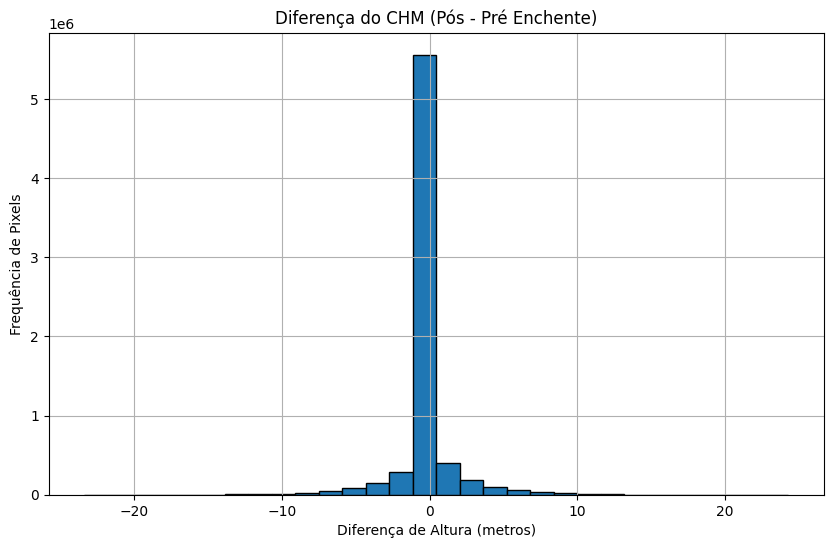

In [17]:
# IMPORTANT: Do not use plt.show in this cell. Add your code to produce plot 1 here

# YOUR CODE HERE
# Histograma
plt.figure(figsize=(10, 6))
plt.hist(diff_chm_crop.flatten(), bins=30, edgecolor="black")
plt.title("Diferença do CHM (Pós - Pré Enchente)")
plt.xlabel("Diferença de Altura (metros)")
plt.ylabel("Frequência de Pixels")
plt.grid(True)
plt.show()

## What does the histogram show you?
Answer the following questions:

1. What do each bar in the histogram plot above represent?
2. What does this histogram tell you about differences in the CHM and in the landscape before vs after the flood?
3. What is the source of the data that you used to create this plot?


YOUR ANSWER HERE
1. Cada barra (bin) mostra o **número de pixels** cujo valor de diferença do CHM (altura da copa pós-enchente MENOS pré-enchente) cai dentro do intervalo de valores daquela barra. Por exemplo, a barra central agrupa todos os pixels com diferença entre –0,5m e +0,5m, a próxima de –1,5m a –1,5m, e assim por diante.

2. A grande concentração de pixels em torno de zero indica que, para a maioria da área estudada, não houve mudança significativa na altura do dossel entre o pré e o pós‑enchente. As partes negativas do gráfico mostram regiões com **perda de vegetação** (valores abaixo de zero), enquanto as partes positivas apontam locais com **ganho de altura** (talvez deposição de sedimentos ou crescimento rápido de plantas) após o evento de inundação.

3. Os dados vêm dos arquivos **DSM** (Modelo de Superfície Digital) e **DTM** (Modelo de Terreno Digital) adquiridos por LiDAR **pré‑enchente** e **pós‑enchente**, no projeto *Colorado Flood* (2013), baixados via `et.data.get_data("colorado-flood")`. ```


## Plot 2: Classified pre/post CHM difference raster

In the cell below, create a plot of the classified the lidar Canopy Height Model raster that you used to create the histogram above.

Use the following bins to classify your data:

* `< -1`
* `between -1 and 1`
* `> 1`

Compare your output plotted raster with your histogram.

Add a legend to your plot with the following categories:

* Loss
* No Change
* Gain

These categories should map to the bins that you used to classified the data

In [18]:
# IMPORTANT: Name your classified raster object diff_chm_class
# IMPORTANT: Do not use plt.show in this cell.

# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

# Reutilizando diff_chm_crop calculado anteriormente

# --- 1. Classificação em três categorias ---
# 0 = Loss   (< -1 m)
# 1 = No Change  (entre -1 e 1 m)
# 2 = Gain   (>  1 m)
classified = np.zeros_like(diff_chm_crop, dtype=np.int8)
classified[diff_chm_crop < -1] = 0
classified[(diff_chm_crop >= -1) & (diff_chm_crop <= 1)] = 1
classified[diff_chm_crop > 1] = 2


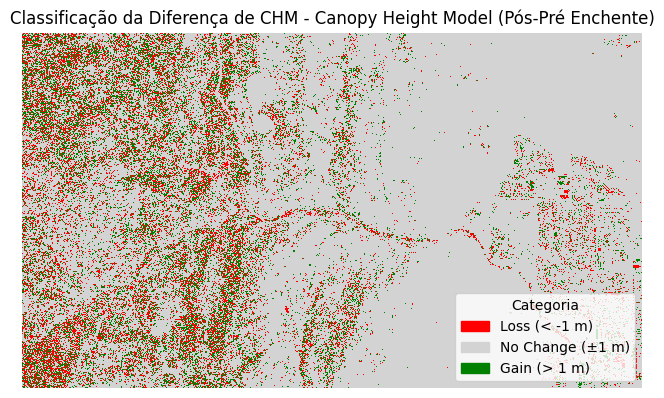

In [19]:
# --- 2. Definir cores bem contrastantes ---
colors = ['red', 'lightgray', 'green']
cmap = ListedColormap(colors)

# --- 3. Plotar a imagem classificade ---
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(classified, cmap=cmap, interpolation='none')
ax.set_title("Classificação da Diferença de CHM - Canopy Height Model (Pós-Pré Enchente)")
ax.set_axis_off()

# --- 4. Construir legenda manualmente ---
labels = ["Loss (< -1 m)", "No Change (±1 m)", "Gain (> 1 m)"]
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(3)]
ax.legend(handles=patches,
          loc="lower right",
          title="Categoria")

plt.show()

## Plot 3: pre/post DTM Difference Raster Histogram

Create a cropped raster map that shows positive and negative change in the digital terrain model before and after the flood. To do this:

* Subtract the pre-flood DTM from the post-flood DTM (post_flood_DTM - pre_flood_DTM).
* Crop the data using the data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp` crop_extent shapefile.

Plot a histogram of the cropped pre/post DTM data that you created above. Set your bin number to 30 and be sure to label the x and y axis with appropriate units!

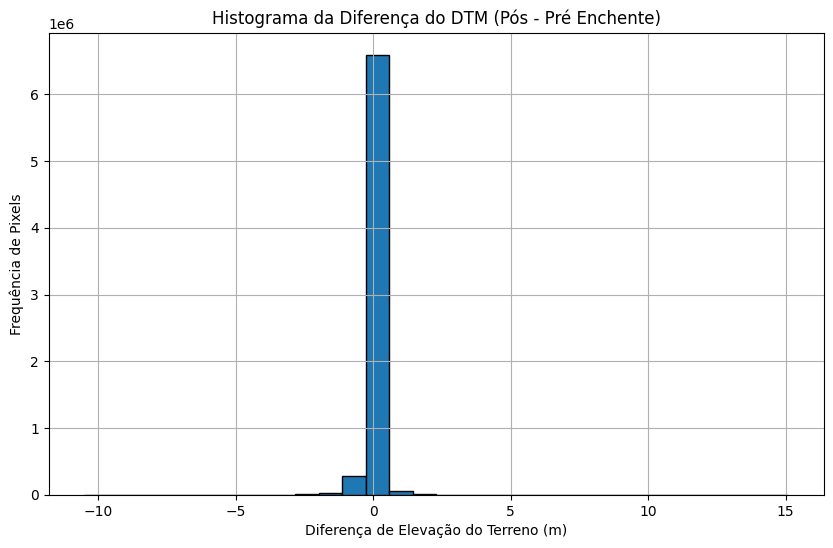

In [20]:
# Ajuste este caminho para onde estão seus dados
base_dir = os.path.expanduser(
    "~/earth-analytics/data/colorado-flood/spatial/boulder-leehill-rd"
)
# Montando os caminhos corretos
pre_dtm_path  = os.path.join(base_dir, "pre-flood",  "lidar", "pre_DTM.tif")
post_dtm_path = os.path.join(base_dir, "post-flood", "lidar", "post_DTM.tif")
clip_path     = os.path.join(base_dir, "clip-extent.shp")

# Carregando e recortar o shapefile de recorte
crop_extent = gpd.read_file(clip_path)
crop_extent = crop_extent.to_crs(epsg=32613)

# Recortando o pré-DTM
with rasterio.open(pre_dtm_path) as src_pre:
    pre_dtm_crop, _ = mask(src_pre, crop_extent.geometry, crop=True)

# Recortando o pós-DTM
with rasterio.open(post_dtm_path) as src_post:
    post_dtm_crop, _ = mask(src_post, crop_extent.geometry, crop=True)

# diferença DTM pós – pré como solicitado
#Subtract the pre-flood DTM from the post-flood DTM (post_flood_DTM - pre_flood_DTM).
dtm_diff = post_dtm_crop[0] - pre_dtm_crop[0]

# histograma com 30 bins
plt.figure(figsize=(10, 6))
plt.hist(dtm_diff.flatten(), bins=30, edgecolor="black")
plt.title("Histograma da Diferença do DTM (Pós - Pré Enchente)")
plt.xlabel("Diferença de Elevação do Terreno (m)")
plt.ylabel("Frequência de Pixels")
plt.grid(True)
plt.show()



## Plot 4: pre/post DTM difference raster

Reclassify your difference DTM using the following range values:

* `< -1`
* `between -1 and 1`
* `> 1`

Plot your difference DTM raster using matplotlib.
Create a legend for your plot that has 3 categories:

* Loss
* No Change
* Gain

Each category should represent one of the "bins" that you used when you classified your data.

In [21]:
# IMPORTANT: Name your classified raster object diff_dtm_crop_class
# IMPORTANT: Do not use plt.show in this cell.

# YOUR CODE HERE
# 1. Reclassificar em três categorias:
#    0 = Loss   (< -1 m)
#    1 = No Change  (entre -1 e 1 m)
#    2 = Gain   (> 1 m)
dtm_class = np.zeros_like(dtm_diff, dtype=np.int8)
dtm_class[dtm_diff < -1]             = 0
dtm_class[(dtm_diff >= -1) & (dtm_diff <= 1)] = 1
dtm_class[dtm_diff > 1]              = 2



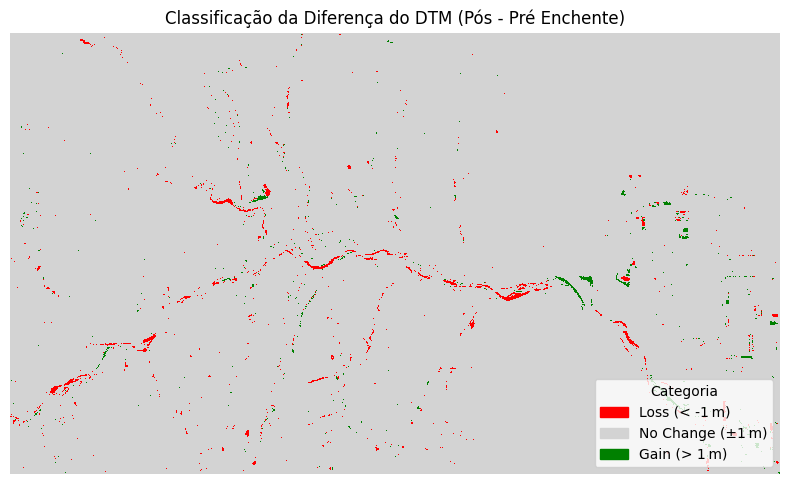

In [22]:
# 2. Definir cores contrastantes para as três classes
colors = ["red", "lightgray", "green"]
cmap   = ListedColormap(colors)

# 3. Plotar a imagem reclassificada
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(dtm_class, cmap=cmap, interpolation="none")
ax.set_title("Classificação da Diferença do DTM (Pós - Pré Enchente)")
ax.set_axis_off()

# 4. Criar legenda com as categorias
labels = ["Loss (< -1 m)", "No Change (±1 m)", "Gain (> 1 m)"]
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(3)]
ax.legend(handles=patches, loc="lower right", title="Categoria")

plt.tight_layout()
plt.show()

##  Question

* Look at the CHM plot and compare it to the DTM difference plot that you created above
* Consider how the data were collected, what they show and how they were processed? What factors could impact and add uncertainty to the CHM difference map?

Add your answer below using markdown

YOUR ANSWER HERE

Análise Comparativa

Ao comparar o mapa de diferença de CHM com o de DTM, nota-se que o CHM destaca alterações na altura do dossel, enquanto o DTM evidencia mudanças no relevo exposto. Como o CHM resulta da subtração do DTM do DSM, erros em qualquer entrada se propagam e podem até amplificar as discrepâncias. Entre as principais fontes de incerteza estão pequenos desalinhamentos espaciais entre as aquisições pré e pós (que criam “fantasmas” de vegetação), classificações incorretas de retornos de vegetação versus solo (aumentando o CHM onde o DTM ficou mais achatado), variações na densidade de pontos LiDAR e na penetração de múltiplos retornos em copas densas, bem como ruídos do sensor e artefatos de interpolação.

Além disso, mudanças sazonais ou condições meteorológicas distintas entre as coletas podem gerar diferenças atribuídas indevidamente à enchente. Esses fatores reforçam a importância de validar o CHM com dados de campo e considerar métricas de qualidade antes de interpretar as perdas ou ganhos de altura do dossel.
